In [1]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso  # 线性回归
from sklearn.model_selection import train_test_split  # 这里是引用了交叉验证

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
plt.rcParams['font.family'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
%matplotlib inline

In [2]:
%store -r samples_data
# cluster 1st
%store -r model_features_1st
%store -r produc_features_1st
%store -r weight_1st
# cluster 2nd
%store -r model_features_2nd
%store -r produc_features_2nd
%store -r weight_2nd

In [3]:
if ('时间', 'Unnamed: 1_level_1') in model_features_1st.keys():
    del model_features_1st[('时间', 'Unnamed: 1_level_1')]
model_features_1st.head(n=5)

S-ZORB.PDT_1003.DACA S-ZORB.PDC_2607.PV S-ZORB.FT_1001.PV  \
           P-101B入口过滤器差压          R102转剂线压差        催化汽油进装置总流量   
324             0.781582           2.298517         -0.493806   
323             0.790615           2.458313          0.100866   
322             0.825225           2.467138         -0.073275   
321             0.833295           2.771304          0.250866   
320             0.839410           2.768240          0.021444   

    S-ZORB.PC_1301.PV S-ZORB.AT_1001.PV S-ZORB.PT_7510B.DACA  \
            K101机出口压力          进装置原料硫含量           K-103B排气压力   
324         -0.938367         -0.626294             4.457135   
323         -0.885359         -0.397364             4.466896   
322         -0.935408         -0.321819             4.464652   
321         -0.899944         -0.149718             4.463725   
320         -0.917109         -0.133473             4.462948   

    S-ZORB.CAL.LINE.PV S-ZORB.LT_3801.DACA S-ZORB.TC_2101.PV  \
                 反应器线速             D-125液位            反吹氢气温度   
324           0.319359           -0.974639          0.529498   
323           0.328913           -0.536389          0.515957   
322           0.247400           -0.416895          0.544970   
321           0.282542           -0.278352          0.532671   
320           0.249137           -0.356965          0.539482   

    S-ZORB.FT_3302.DACA S-ZORB.PC_2105.PV S-ZORB.TC_2201.OP  \
         P-105A/B出口总管流量            反吹氢气压力           EH101出口   
324            0.537023          0.868349         -0.315758   
323            0.537023          0.854613         -0.315758   
322            0.537023          0.824682         -0.315758   
321            0.537023          0.812126         -0.315758   
320            0.537023          0.863843         -0.315758   

    S-ZORB.DT_2001.DACA S-ZORB.BS_AT_2401.PV S-ZORB.PDT_2104.PV      原料性质  \
            R-101下部床层压降              闭锁料斗烃含量            反应器顶底压差    辛烷值RON   
324           -0.000622            -0.084279          -1.188444 -0.450083   
323           -0.062300            -0.148180          -1.316514 -1.334342   
322           -0.103762            -0.117860          -1.398743 -1.334342   
321           -0.116618            -0.196347          -1.422260 -1.688045   
320           -0.170912            -0.141963          -1.540949 -1.688045   

               
     硫含量,μg/g  
324  0.185228  
323  0.185228  
322  0.292148  
321  0.292148  
320  0.292148

In [4]:
if ('时间', 'Unnamed: 1_level_1') in model_features_2nd.keys():
    del model_features_2nd[('时间', 'Unnamed: 1_level_1')]
model_features_2nd.head(n=5)

S-ZORB.FT_9301.PV S-ZORB.FC_1005.PV S-ZORB.FC_5103.DACA S-ZORB.FT_1003.PV  \
              蒸汽进装置流量           原料泵出口流量            稳定塔顶回流流量       2#催化汽油进装置流量   
302          0.399857          0.814090            0.596805          1.385896   
291          0.357621         -0.591307           -0.811233          1.372257   
290          1.181242         -2.258051            0.135166          2.026466   
289          0.857521         -1.226785           -0.254314          1.984460   
288          1.266996         -1.201610            0.093126          1.841029   

    S-ZORB.AT-0001.DACA.PV S-ZORB.TE_2301.PV      原料性质            
            S_ZORB AT-0001            D105温度    辛烷值RON  硫含量,μg/g  
302              -0.931222         -0.698642  1.538911  1.123836  
291              -0.929116         -0.794228 -0.461673 -1.134292  
290              -0.932145         -0.438160  0.126734 -1.134292  
289              -0.928506         -0.431593  0.009052 -1.134292  
288              -0.928163         -0.305706  0.009052 -1.671040

## 对于 类别-1 进行线性回归建模

In [5]:
# 构建训练集和测试集 cluster 1st
X = model_features_1st
y = produc_features_1st[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(141, 17)
y_train.shape=(141, 1)
X_test.shape=(48, 17)
y_test.shape=(48, 1)


In [6]:
# 简单线性回归
# Applying LinearRegression
model_1st = Lasso(alpha=0.1)
model_1st.fit(X_train, y_train)
y_train_pred = model_1st.predict(X_train)
y_test_pred = model_1st.predict(X_test)
y_pred = model_1st.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y, y_pred)))

MSE train:0.935, test:0.888, whole:0.923
R^2 train:0.080, test:0.060, whole:0.077


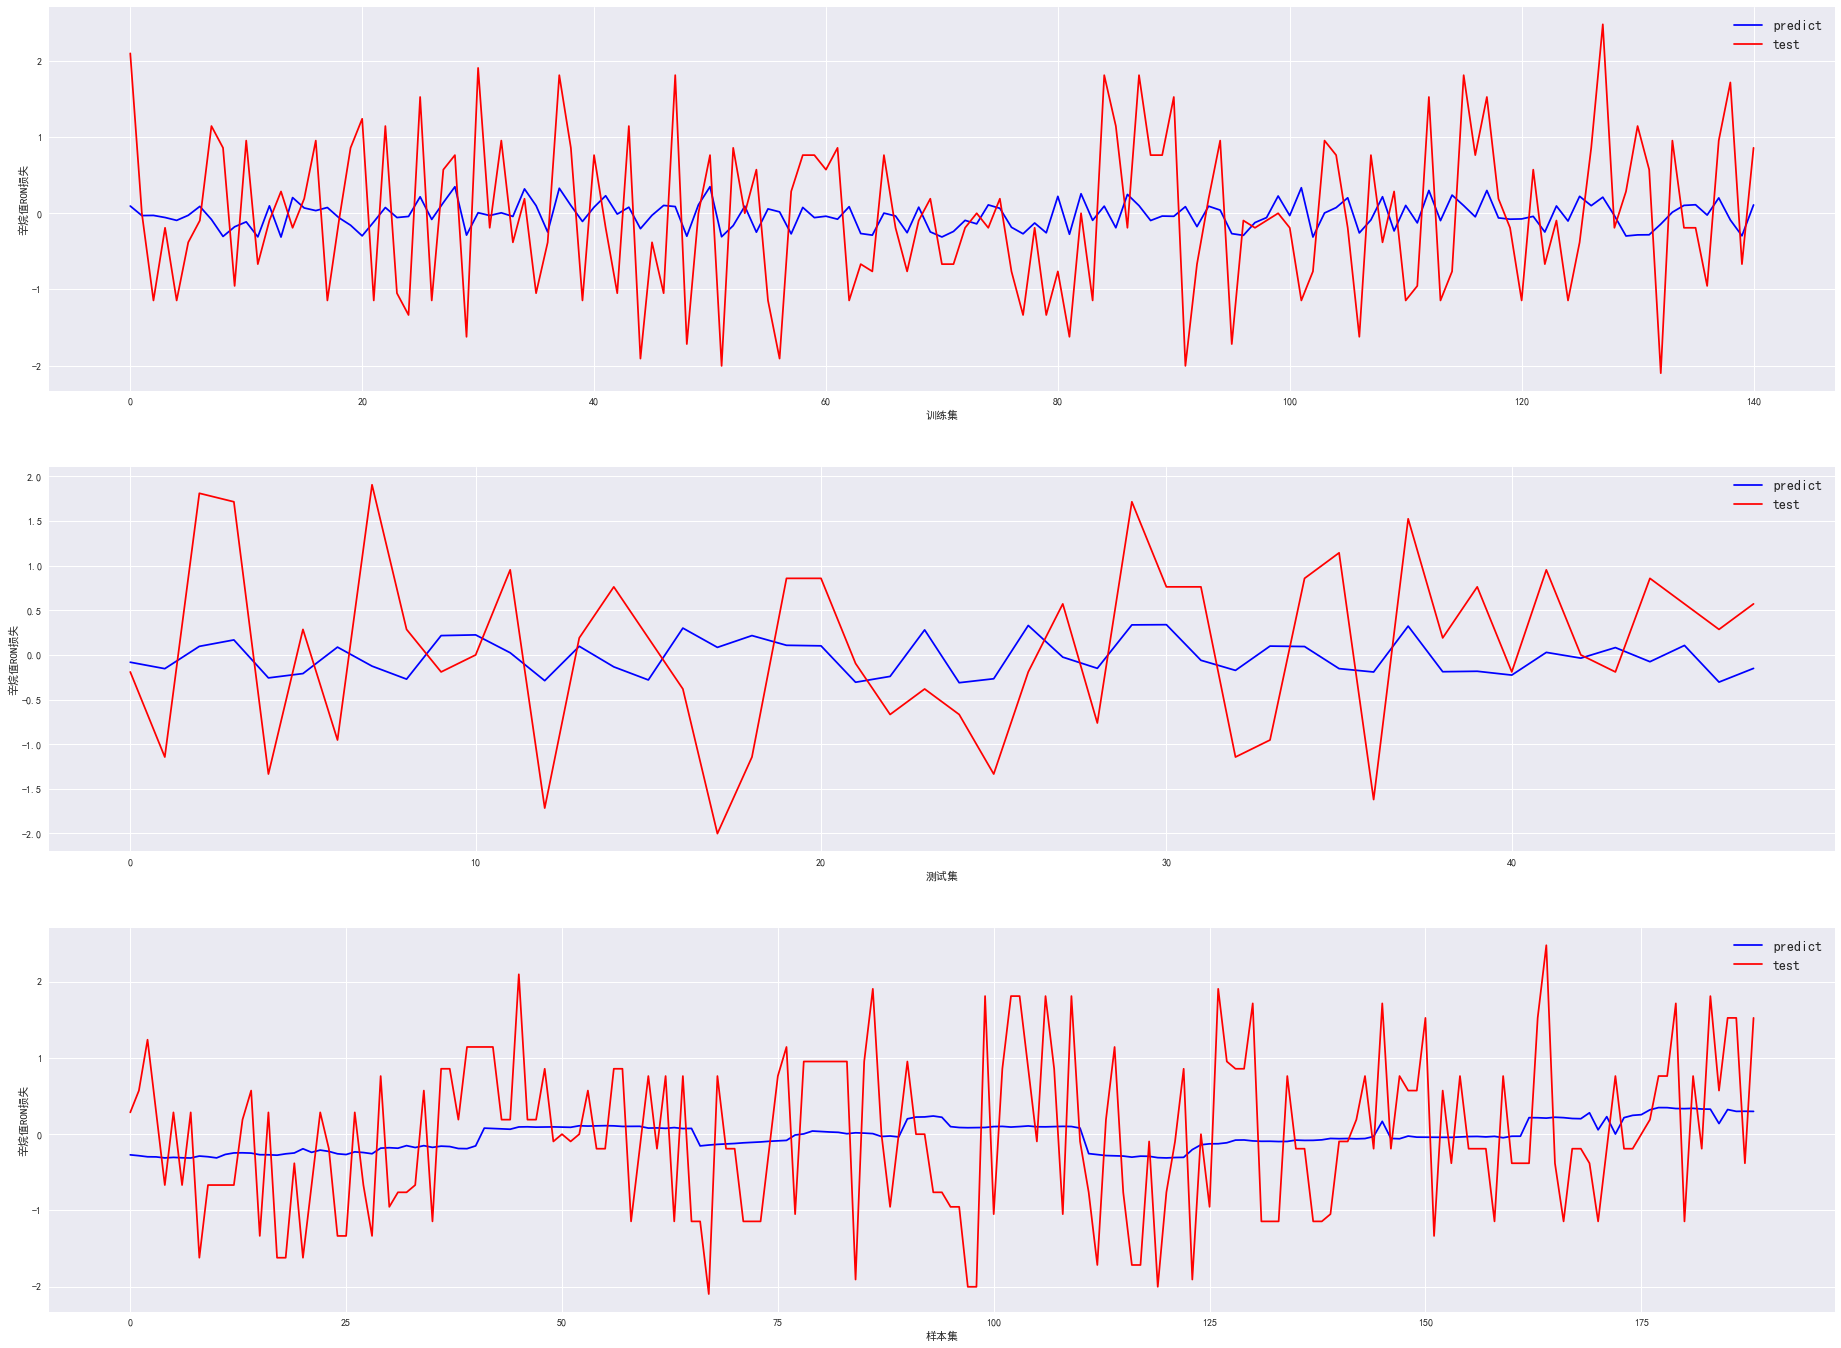

In [7]:
plt.figure(figsize = (32, 24))
plt.subplot(311)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(312)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(313)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()

## 对于 类别-2 进行线性回归建模

In [8]:
# 构建训练集和测试集 cluster 2nd
X = model_features_2nd
y = produc_features_2nd[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(87, 8)
y_train.shape=(87, 1)
X_test.shape=(30, 8)
y_test.shape=(30, 1)


In [9]:
# 简单线性回归
# Applying LinearRegression
model_2nd = Lasso(alpha=0.1)
model_2nd.fit(X_train, y_train)
y_train_pred = model_2nd.predict(X_train)
y_test_pred = model_2nd.predict(X_test)
y_pred = model_2nd.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y, y_pred)))

MSE train:0.711, test:0.727, whole:0.715
R^2 train:0.315, test:0.126, whole:0.285


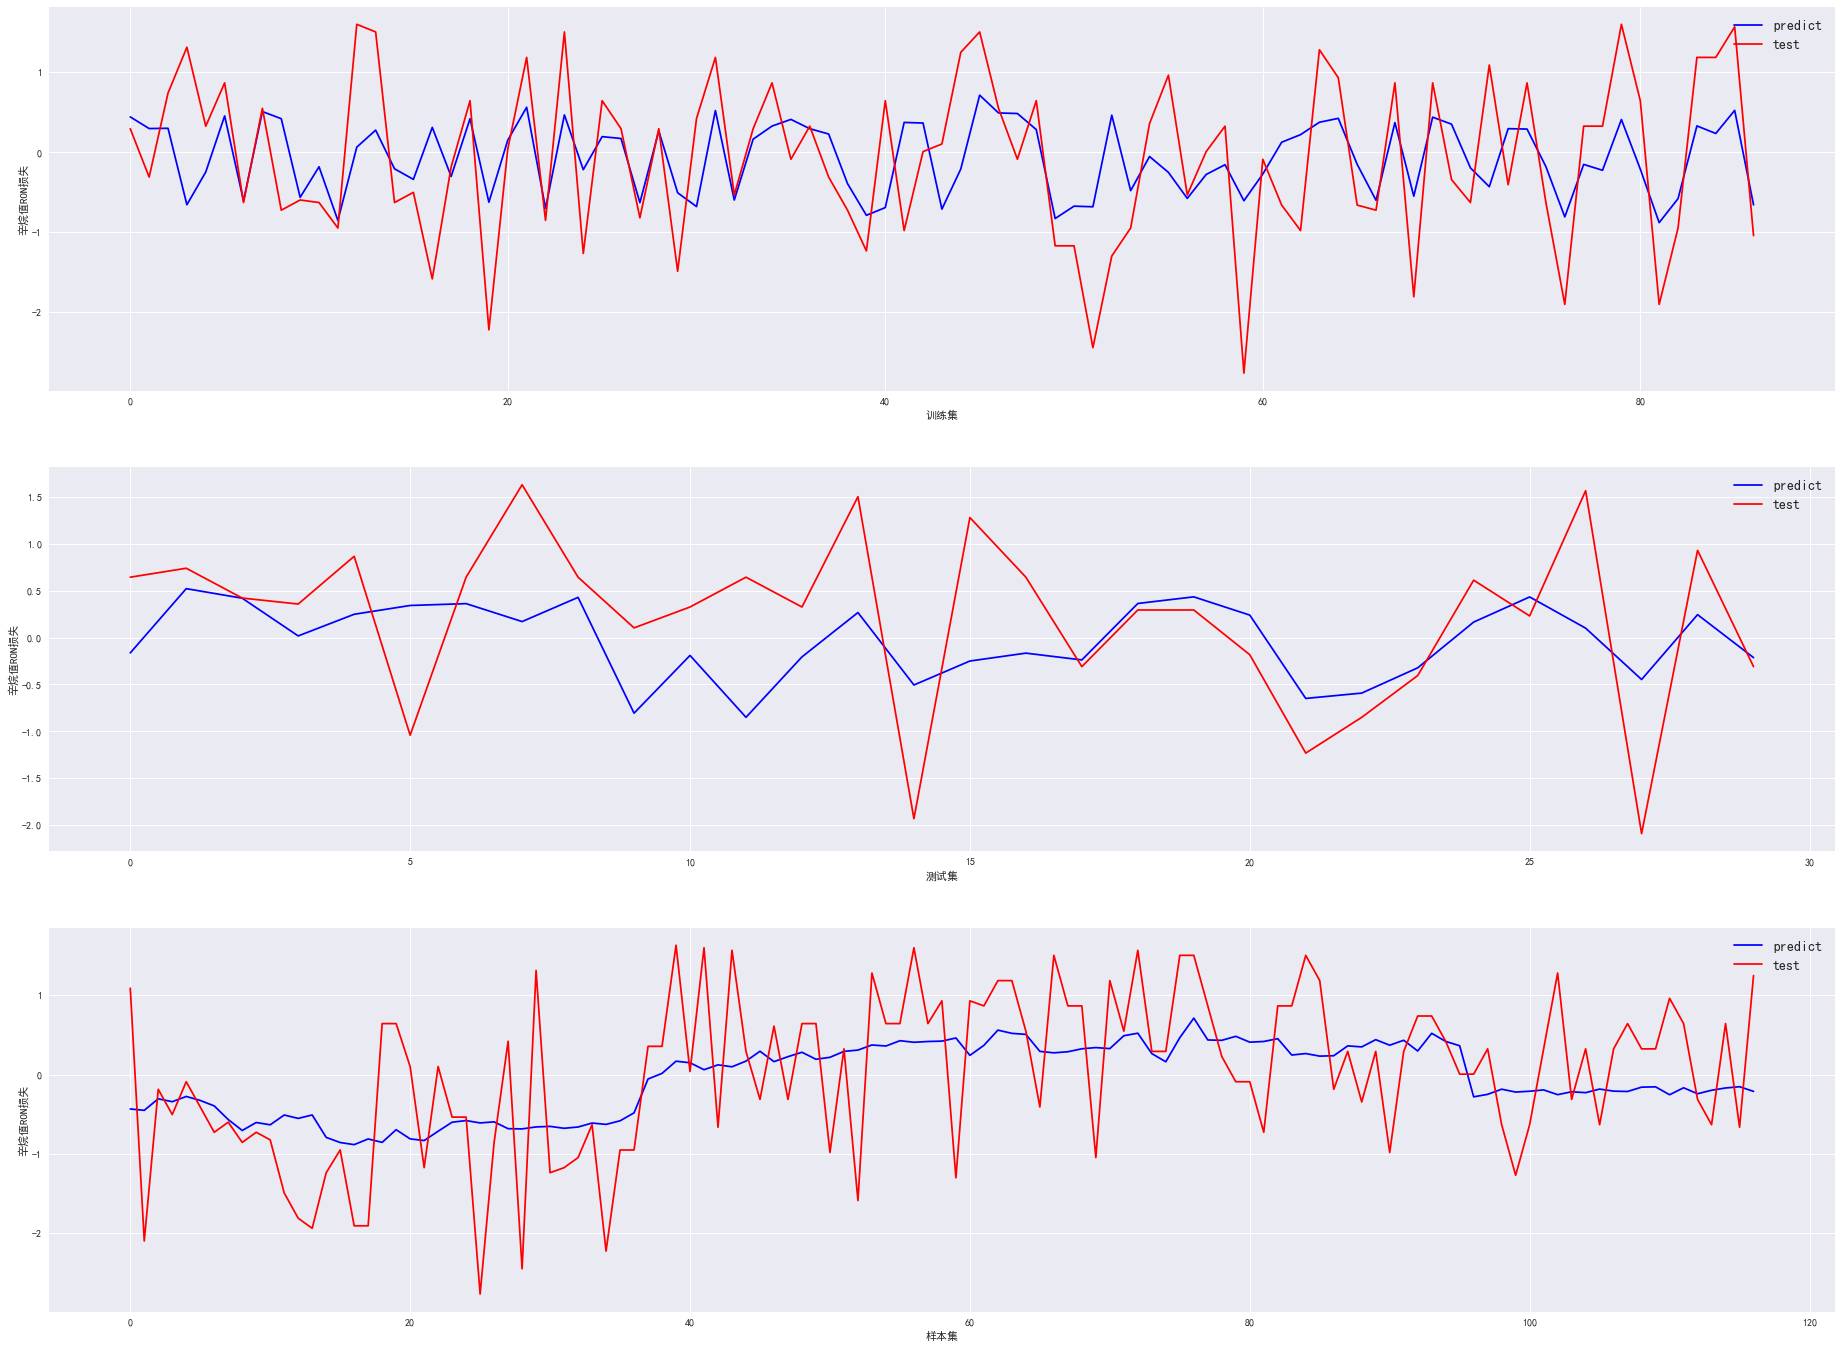

In [10]:
plt.figure(figsize = (32, 24))
plt.subplot(311)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(312)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(313)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()

## 选择各聚类的模型的特征的并集

In [11]:
X = samples_data[list(set(model_features_1st.keys()).union(set(model_features_2nd.keys())))]
y = samples_data[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(243, 23)
y_train.shape=(243, 1)
X_test.shape=(82, 23)
y_test.shape=(82, 1)


In [12]:
# 简单线性回归
# Applying LinearRegression
model_3rd = Lasso(alpha=0.1)
model_3rd.fit(X_train, y_train)
y_train_pred = model_3rd.predict(X_train)
y_test_pred = model_3rd.predict(X_test)
y_pred = model_3rd.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y, y_pred)))

MSE train:0.047, test:0.035, whole:0.044
R^2 train:0.163, test:0.053, whole:0.144


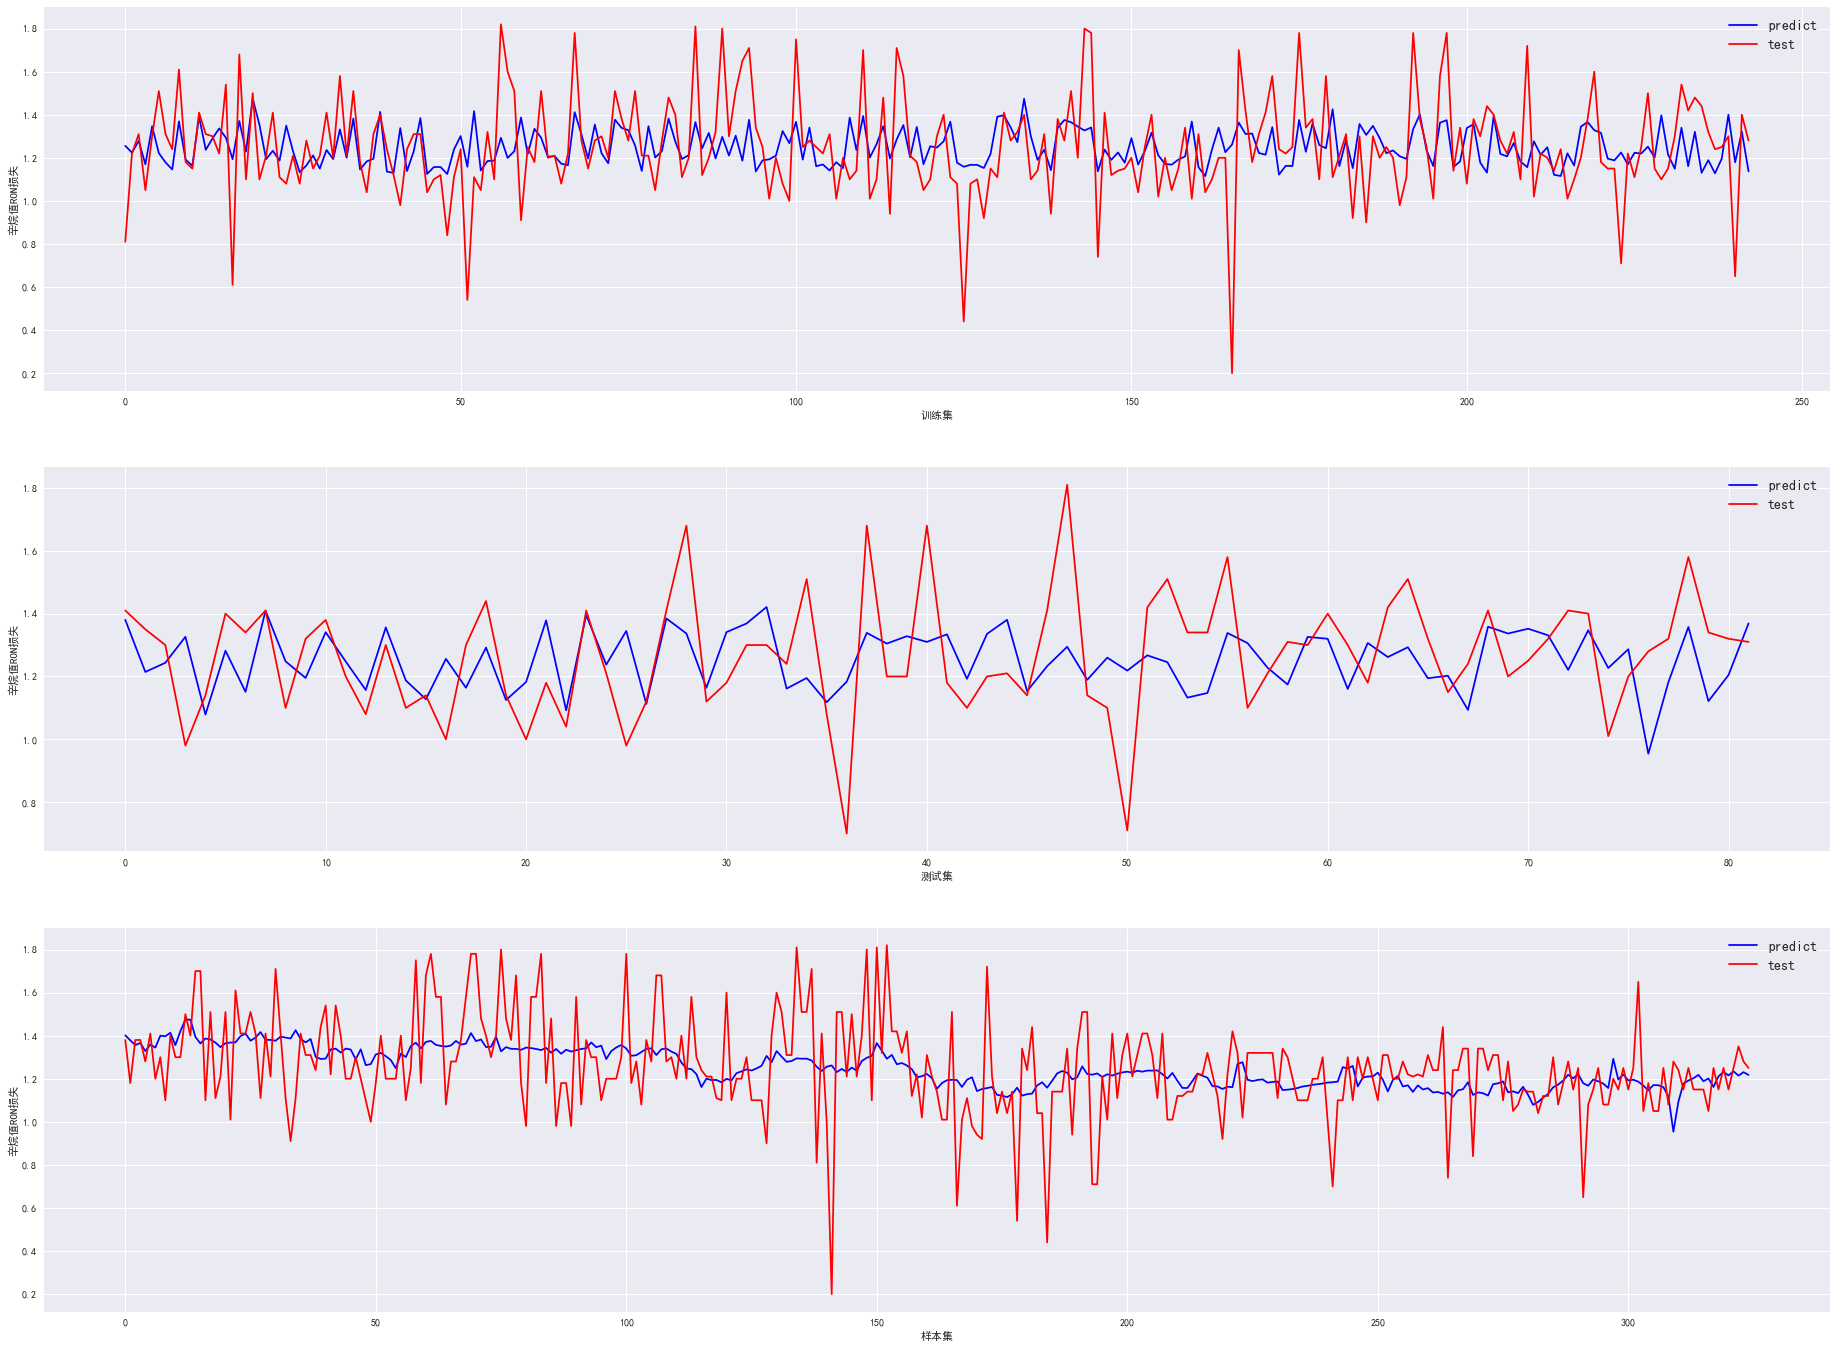

In [13]:
plt.figure(figsize = (32, 24))
plt.subplot(311)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(312)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(313)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()

## 选择各聚类线性模型的特征的交集

In [14]:
X = samples_data[list(set(model_features_1st.keys()).intersection(set(model_features_2nd.keys())))]
y = samples_data[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(243, 2)
y_train.shape=(243, 1)
X_test.shape=(82, 2)
y_test.shape=(82, 1)


In [15]:
# 简单线性回归
# Applying LinearRegression
model_4th = Lasso(alpha=0.1)
model_4th.fit(X_train, y_train)
y_train_pred = model_4th.predict(X_train)
y_test_pred = model_4th.predict(X_test)
y_pred = model_4th.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y, y_pred)))

MSE train:0.050, test:0.048, whole:0.050
R^2 train:0.026, test:0.022, whole:0.025


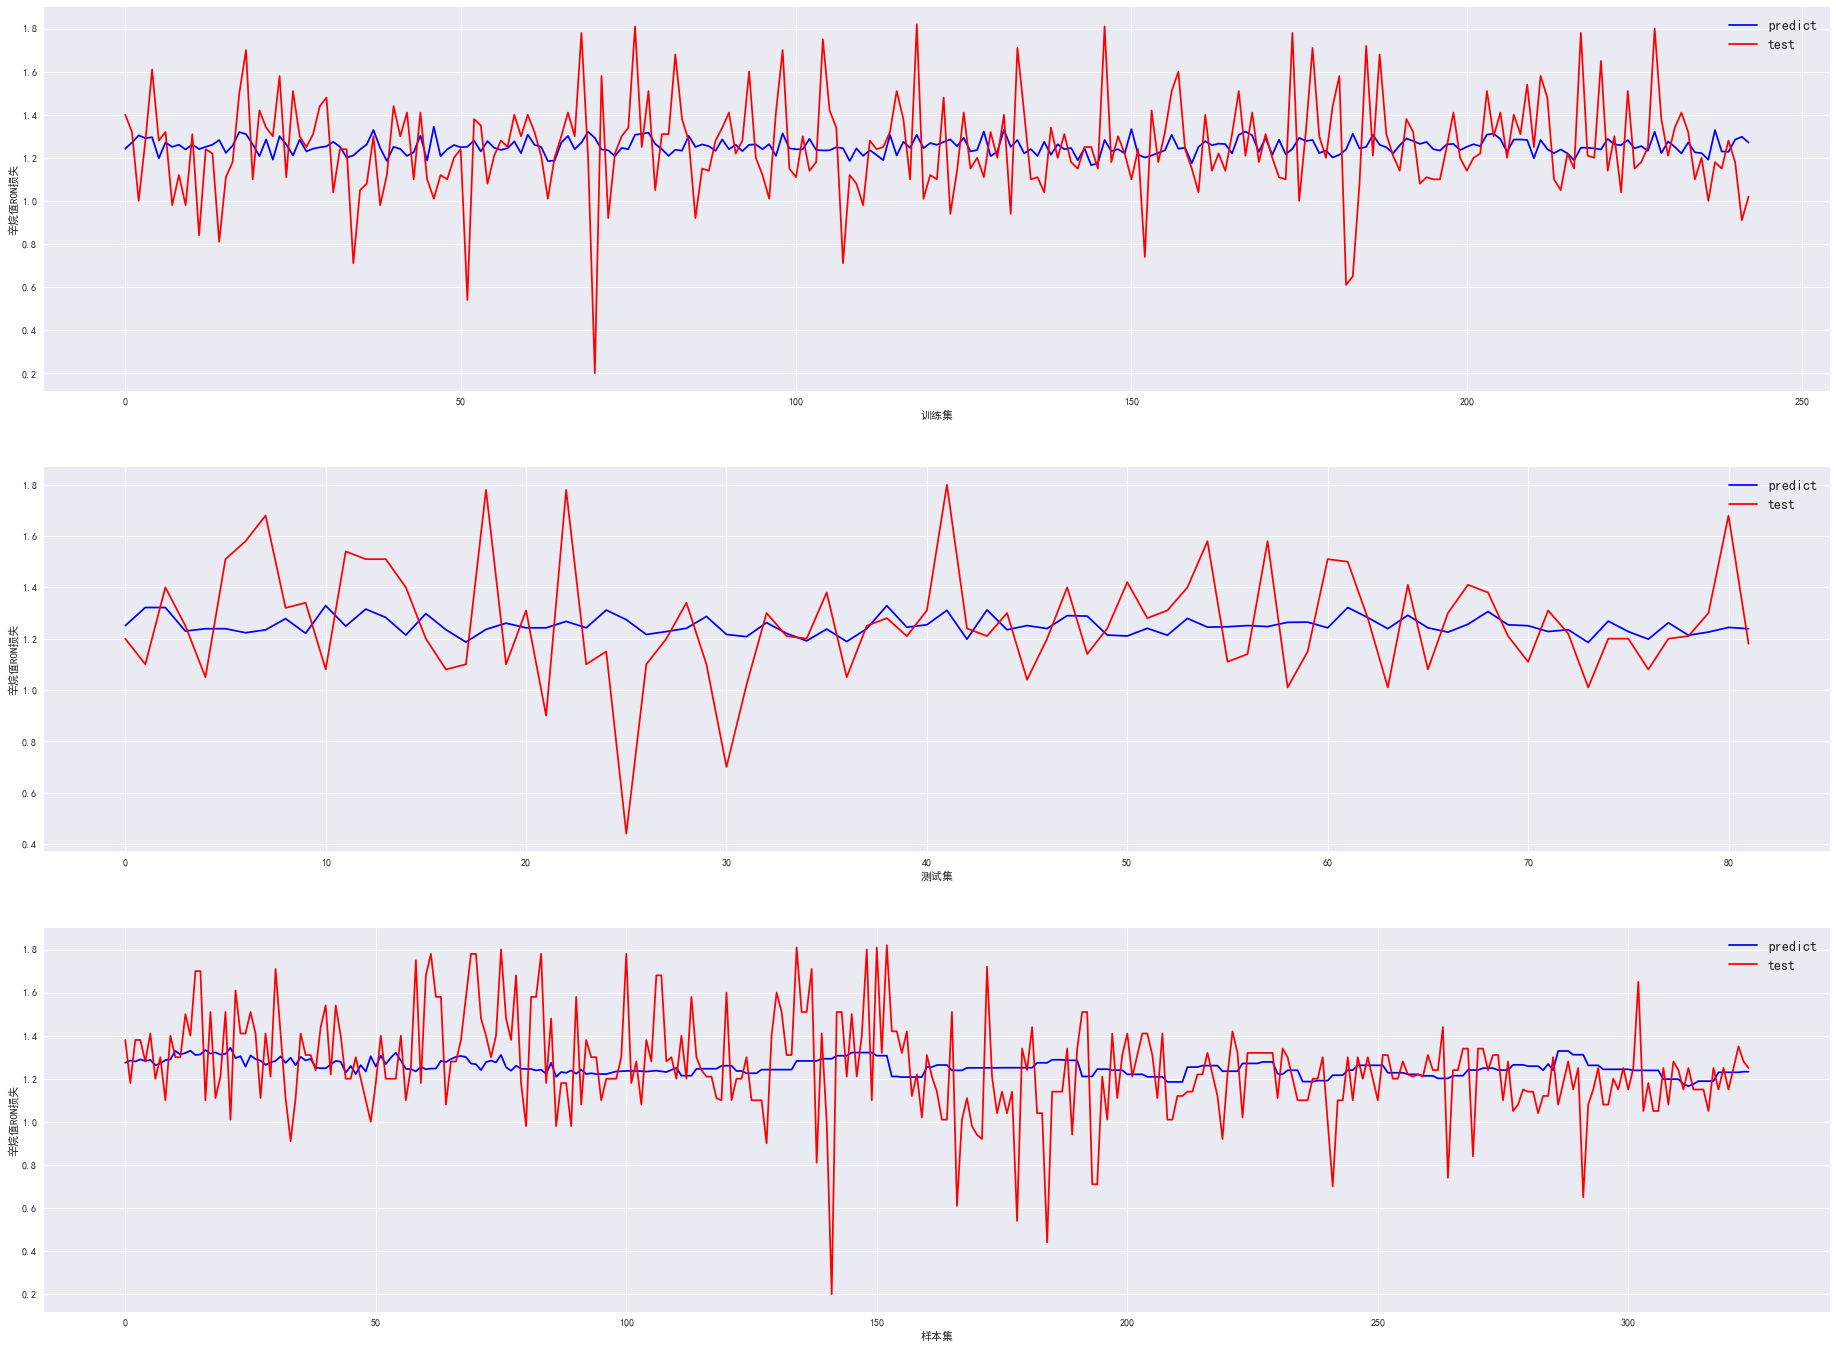

In [16]:
plt.figure(figsize = (32, 24))
plt.subplot(311)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(312)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(313)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()